# Testing the diff method

In [1]:
import os
import sys
import math
import numpy as np

import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.xydata import XYData
from pyda.dsp.spectral import psd
import matplotlib.pyplot as plt
import numpy

FigSize = (15,10) # global setting for figure size

## Matplotlib setup

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

## Generate a sinewave

-------- TSData ---------
  name: S1
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V]

-----------------------------


[<Figure size 1500x1000 with 1 Axes>,
 [<Axes: xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{V}} \\right]$'>],
 [<ErrorbarContainer object of 3 artists>]]

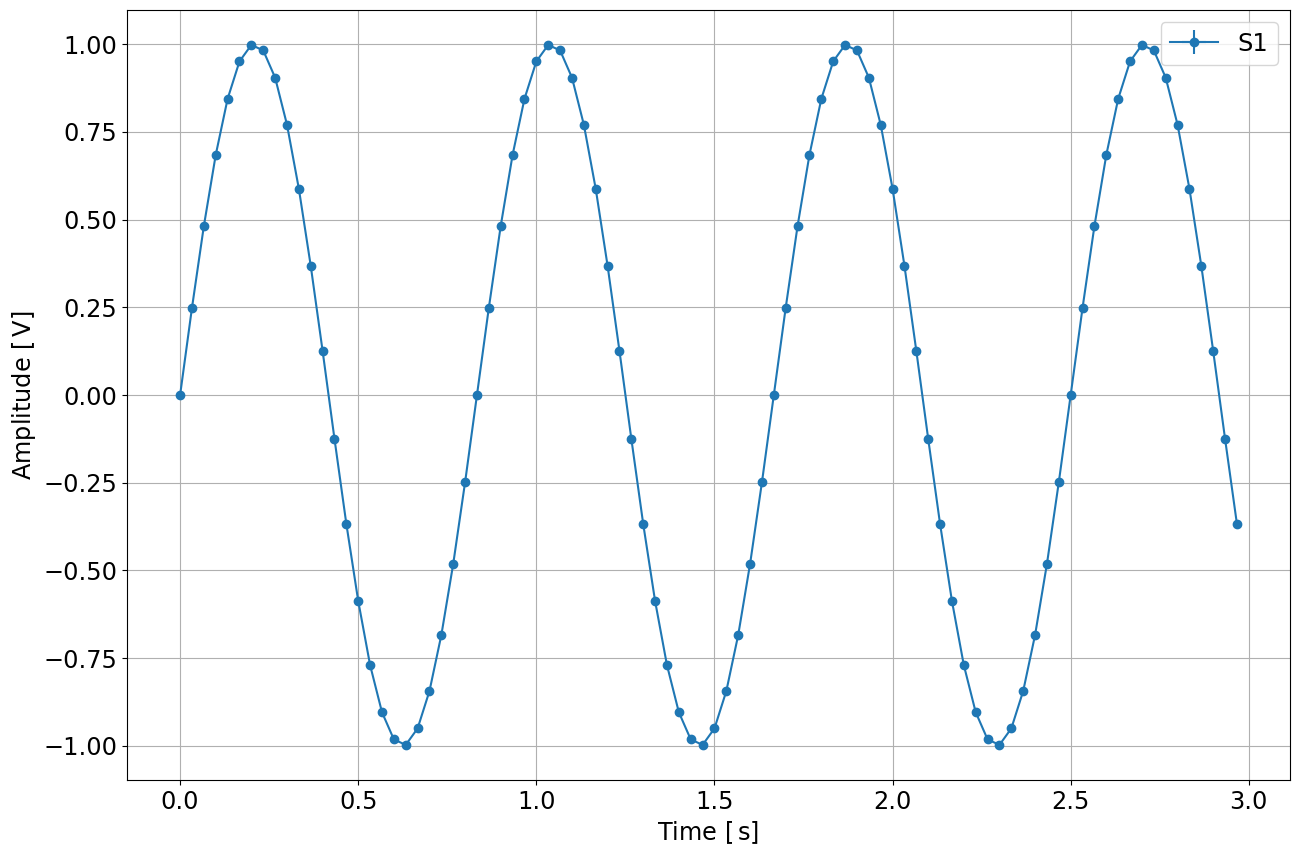

In [3]:
s = TSData.sinewave(fs=30.0, nsecs=3.0, A0=1.0, f0=1.2, phi=0, name='S1', yunits='V')
s.dyaxis=0.2
s.dxaxis=0.2
s.marker = 'o'
print(s)
s.plot(ShowErrors=True)

## Compute derivative with 'diff'

-------- TSData ---------
  name: diff(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: diff(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 2.9666666666666663
 xaxis: Time=(89,)[s]
 yaxis: Amplitude=(89,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: diff(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 2.933333333333333
 xaxis: Time=(88,)[s]
 yaxis: Amplitude=(88,)[V][s^(-2)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-2)]

-----------------------------


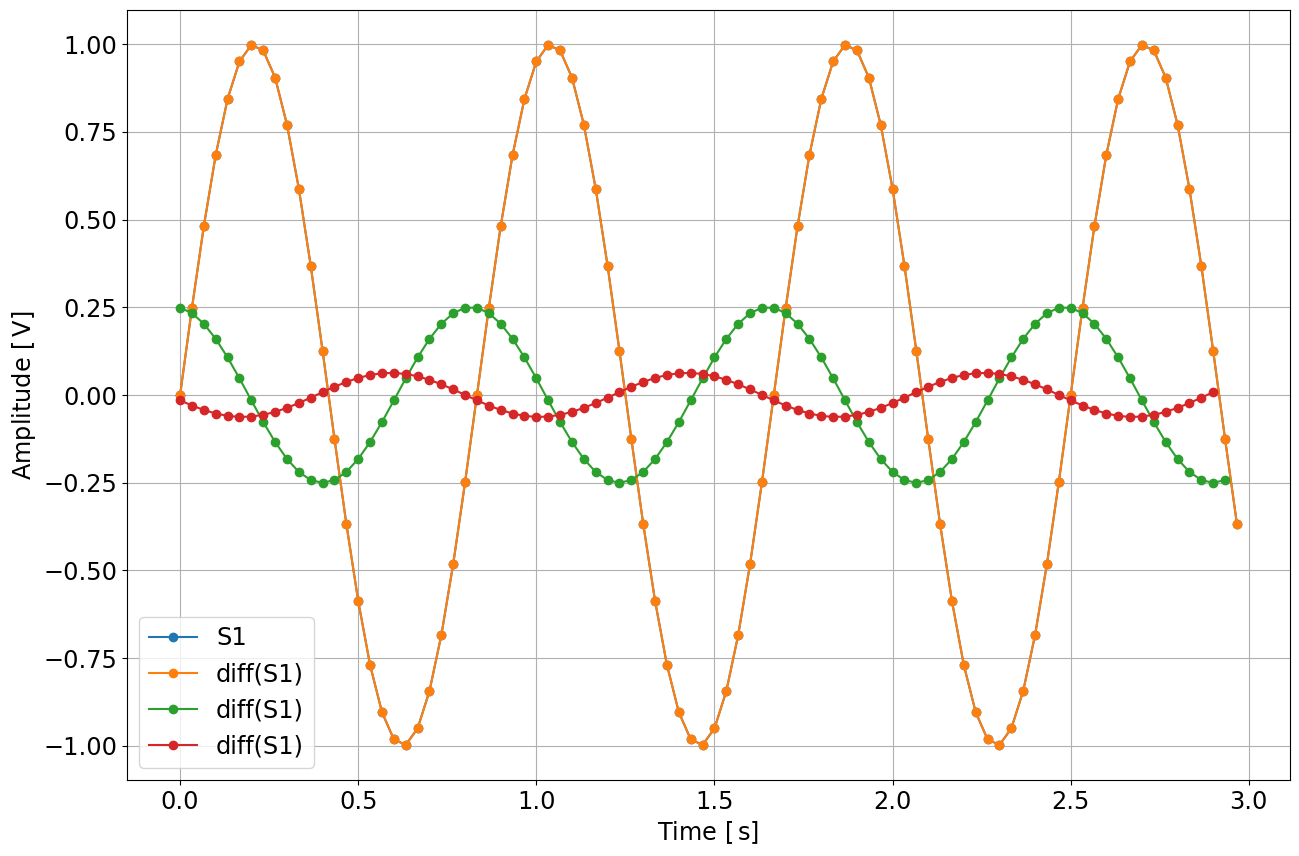

In [4]:

ds0 = s.diff(method='diff', order='Zero')
ds1 = s.diff(method='diff', order='First')
ds2 = s.diff(method='diff', order='Second')

print(ds0)
print(ds1)
print(ds2)
h = s.plot(ds0, ds1, ds2)

## Compute derivative with '2point'


-------- TSData ---------
  name: 2point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 2point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 2.966666666666667
 xaxis: Time=(89,)[s]
 yaxis: Amplitude=(89,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 2point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 2.9333333333333336
 xaxis: Time=(88,)[s]
 yaxis: Amplitude=(88,)[V][s^(-2)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-2)]

-----------------------------


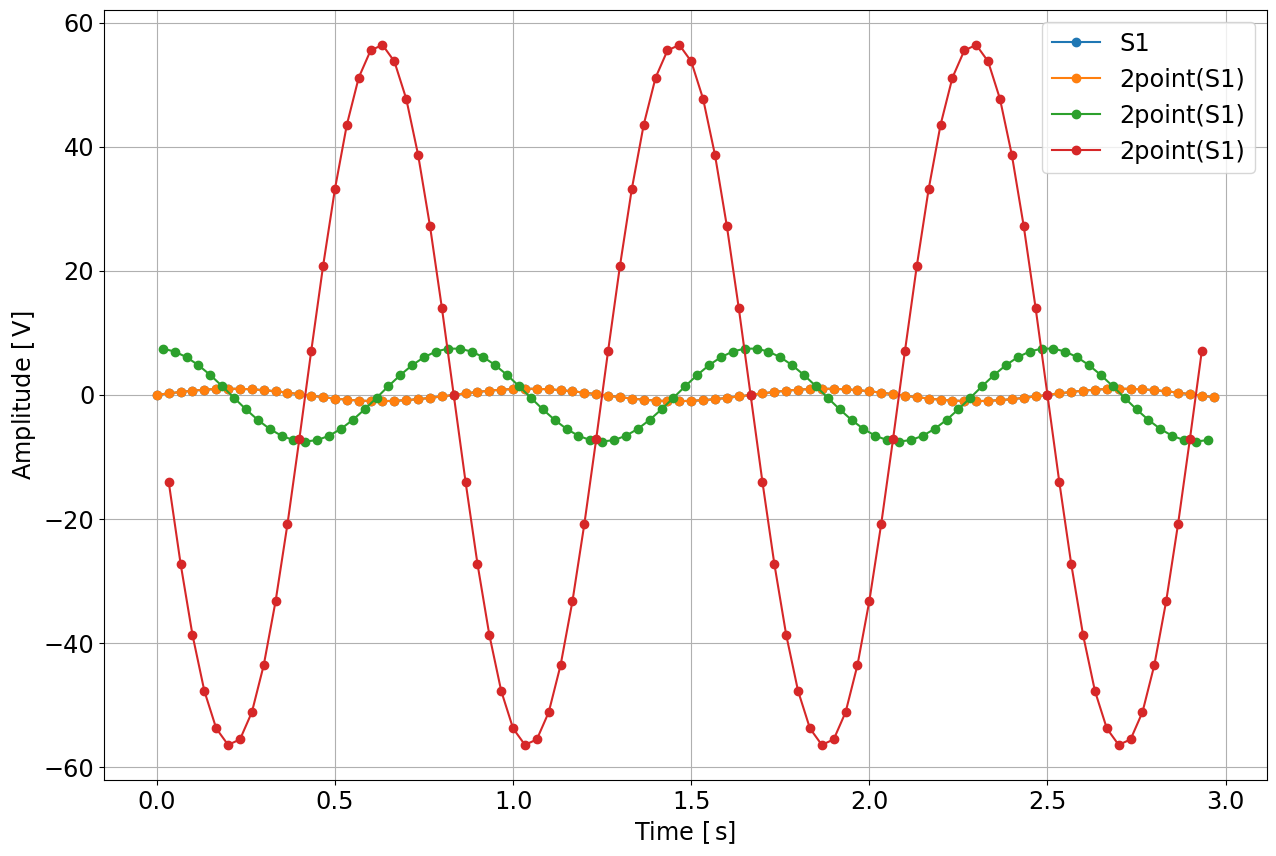

In [5]:
ds0 = s.diff(method='2point', order='Zero')
ds1 = s.diff(method='2point', order='First')
ds2 = s.diff(method='2point', order='Second')

print(ds0)
print(ds1)
print(ds2)
h = s.plot(ds0, ds1, ds2)

## Compute derivative with '3point'

-------- TSData ---------
  name: 3point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 3point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 3point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------


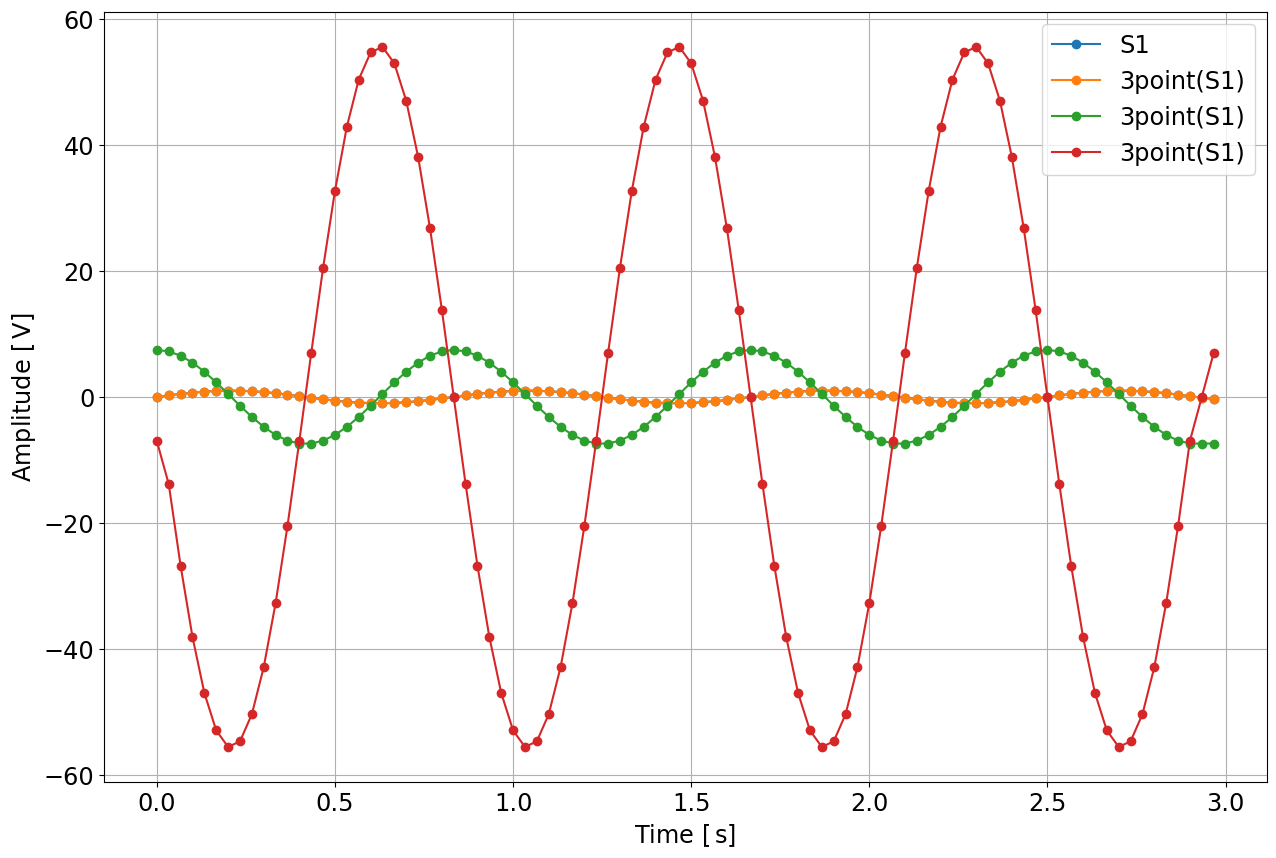

In [6]:
ds0 = s.diff(method='3point', order='Zero')
ds1 = s.diff(method='3point', order='First')
ds2 = s.diff(method='3point', order='Second')

print(ds0)
print(ds1)
print(ds2)
h = s.plot(ds0, ds1, ds2)


## Compute derivative with '5point'

-------- TSData ---------
  name: 5point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 5point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------
-------- TSData ---------
  name: 5point(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------


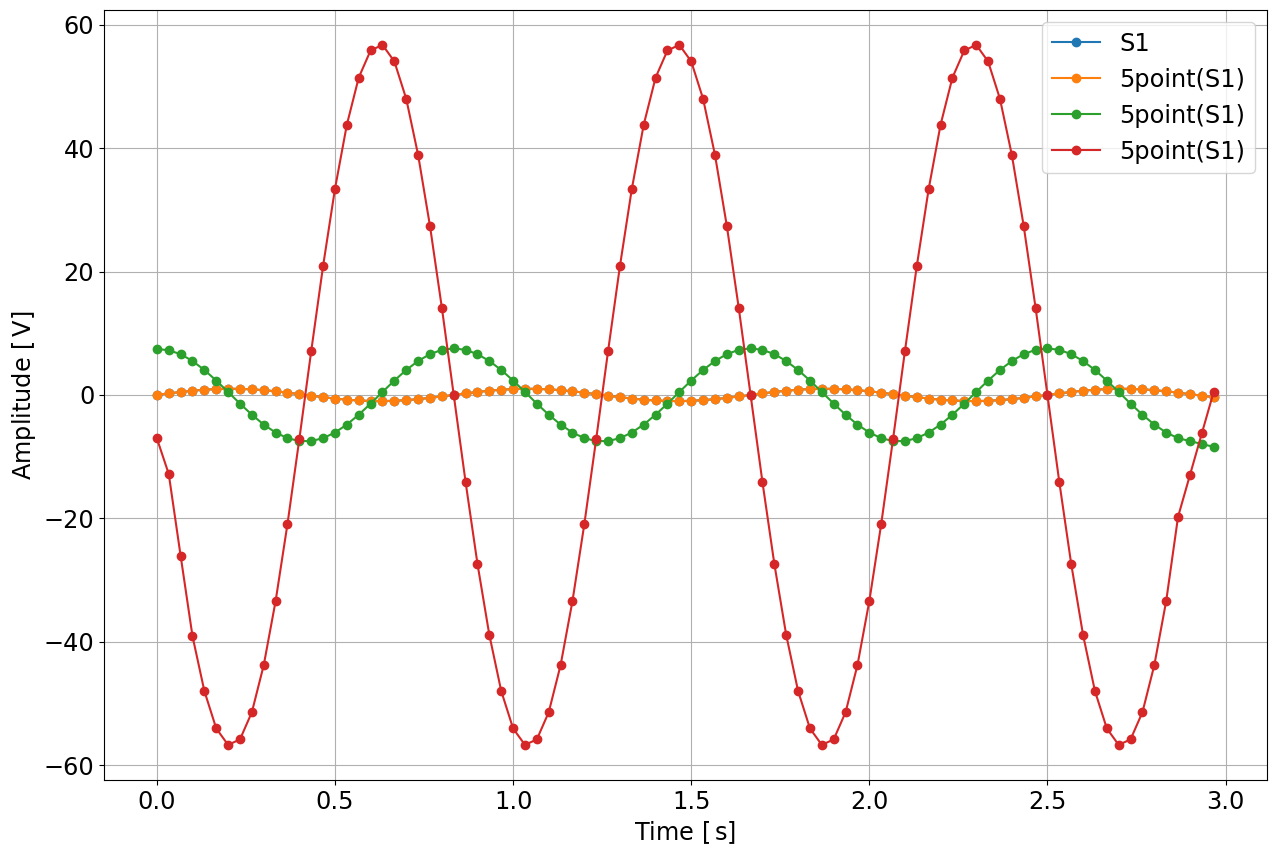

In [7]:
ds0 = s.diff(method='5point', order='Zero')
ds1 = s.diff(method='5point', order='First')
ds2 = s.diff(method='5point', order='Second')

print(ds0)
print(ds1)
print(ds2)
h = s.plot(ds0, ds1, ds2)


## Compute derivative with 'order2'

-------- TSData ---------
  name: order2(S1)
  uuid: 200ea64d-155c-4814-9d80-45f29b01203a
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------


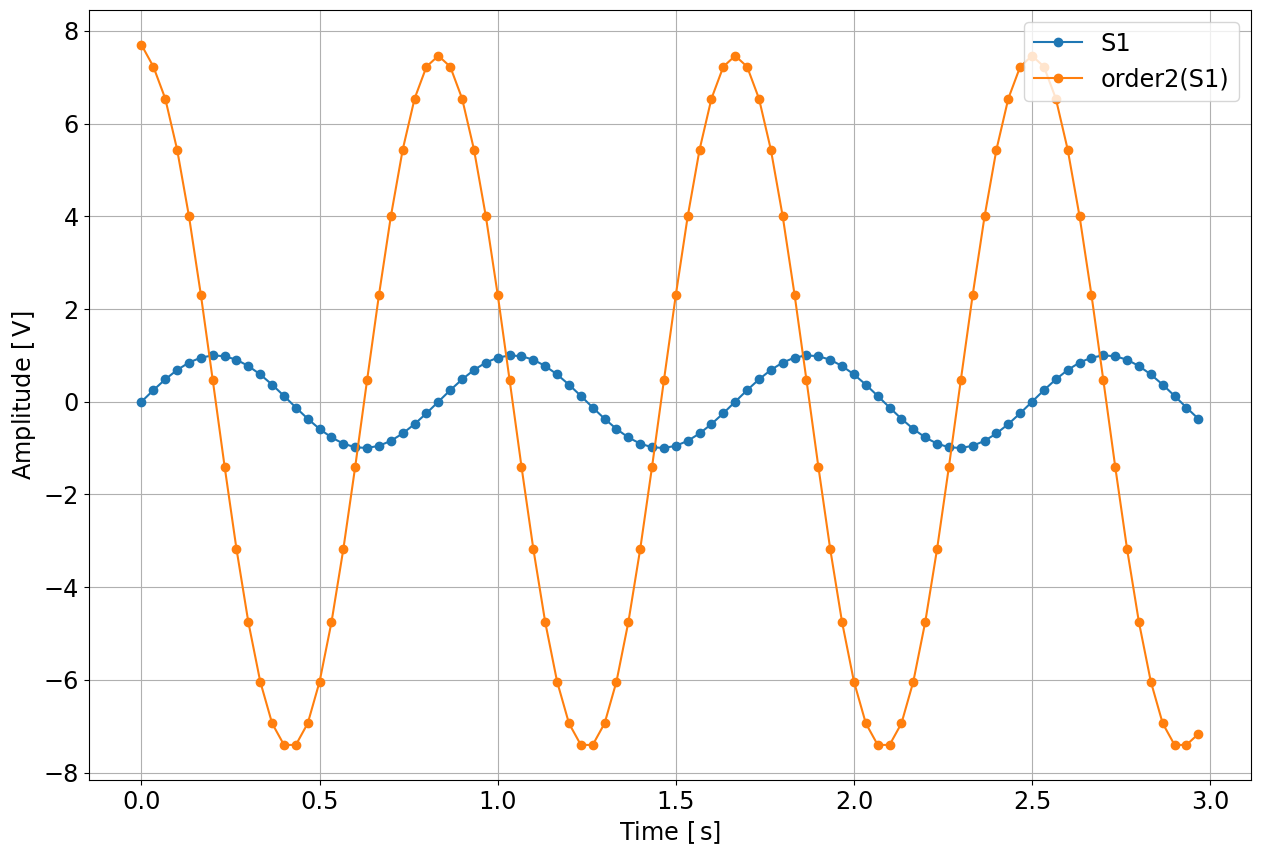

In [8]:
ds1 = s.diff(method='order2')

print(ds1)
h = s.plot(ds1)



## Compute derivative with 'order2smooth'

-------- TSData ---------
  name: order2Smooth(S1)
  uuid: 33655f6c-2296-421a-8bc6-b3dfc304d350
    fs: 30.0
 nsecs: 3.0
 xaxis: Time=(90,)[s]
 yaxis: Amplitude=(90,)[V][s^(-1)]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[V][s^(-1)]

-----------------------------


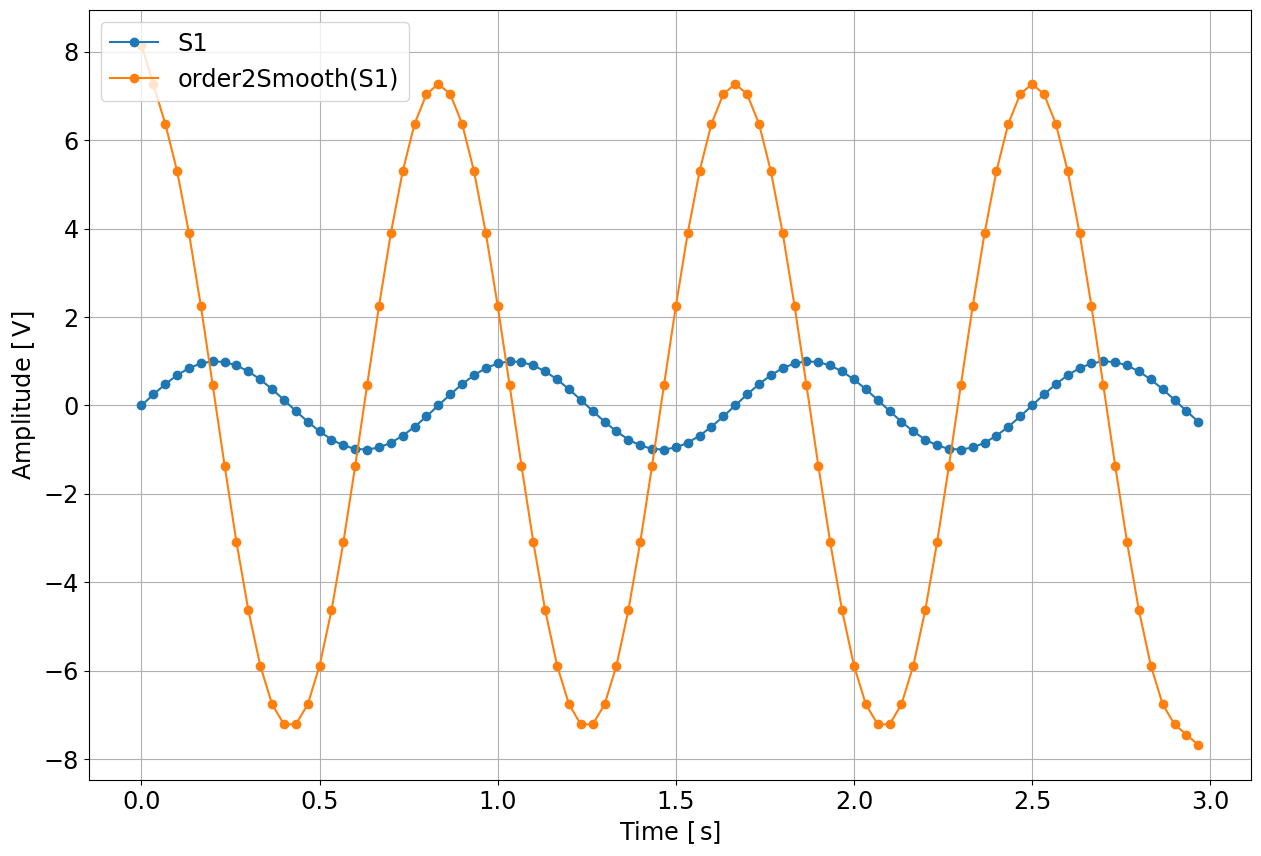

In [9]:
s = TSData.sinewave(fs=30, nsecs=3, A0=1, f0=1.2, phi=0, name='S1', yunits='V')
s.marker = 'o'
ds1 = s.diff(method='order2Smooth')

print(ds1)
h = s.plot(ds1)

## Measure TF

-------- XYData ---------
  name: 3point
  uuid: abe23934-c68d-4d8d-8837-a069d4326eff
 xaxis: Frequency=(1000,)[]
 yaxis: Max(sine)=(1000,)[]
    dx: Frequency=(1,)[]
    dy: Max(sine)=(1,)[]

-----------------------------


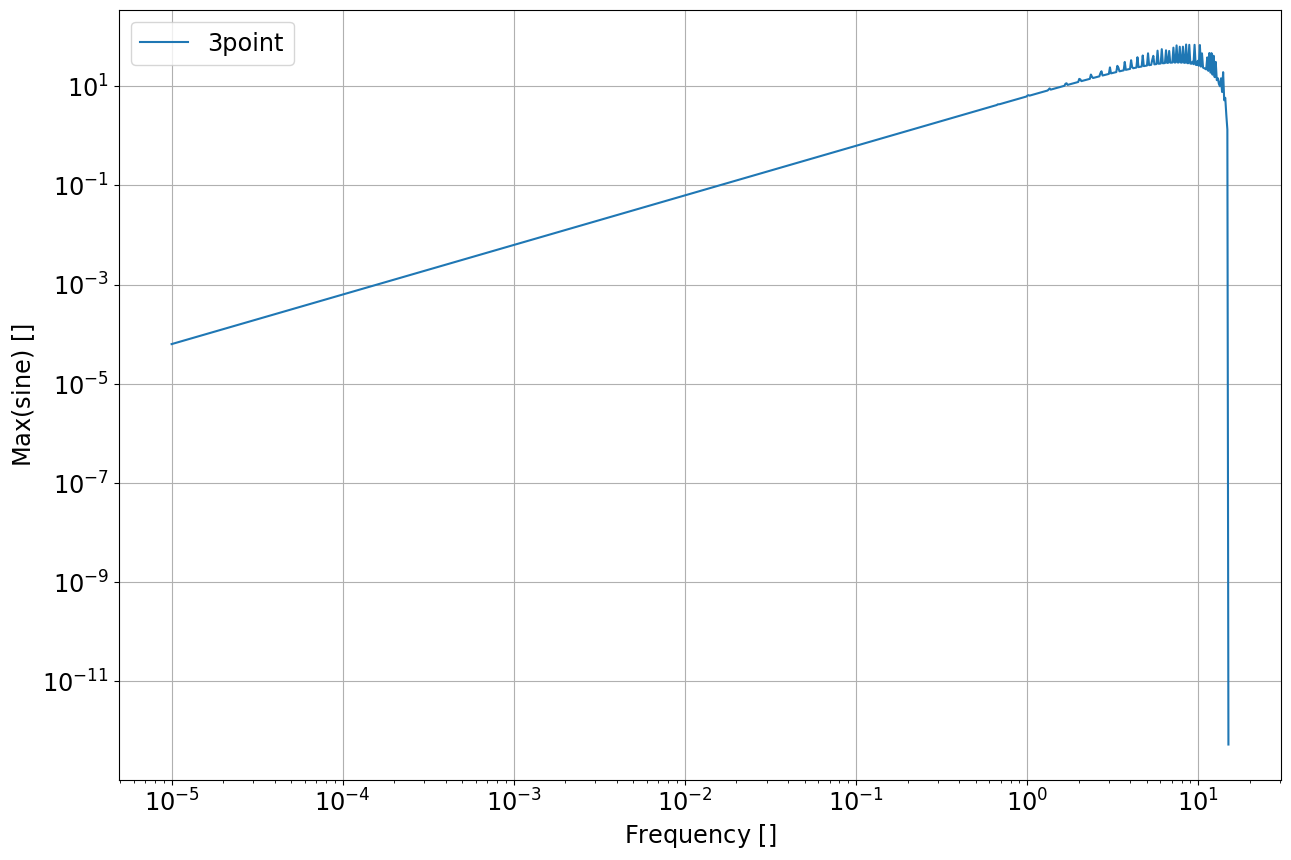

In [10]:

method = '3point'
fs = 30
freqs = numpy.logspace(-5, numpy.log10(fs/2), 1000)

ms = numpy.empty((0,))

for f in freqs:
    s = TSData.sinewave(fs=fs, nsecs=3, A0=1, f0=f, phi=0, name='S1', yunits='V')
    ds = s.diff(method=method)
    mv = numpy.amax(ds.ydata())
    ms = numpy.append(ms, mv)

tf = XYData(xaxis=freqs, yaxis=ms, name=method, xname='Frequency', yname='Max(sine)')
print(tf)
h = tf.loglog()


In [11]:

d = numpy.array([1, 2, 3, 4])
print(d)
m = len(d)

print(d[1:m-1])

[1 2 3 4]
[2 3]


In [12]:
print(ds2.ydata())

[-7.03174510e+00 -1.28155808e+01 -2.60617555e+01 -3.90946813e+01
 -4.79864609e+01 -5.40522645e+01 -5.67217655e+01 -5.58272294e+01
 -5.14248631e+01 -4.37912836e+01 -3.34061366e+01 -2.09219593e+01
 -7.12317825e+00  7.12317825e+00  2.09219593e+01  3.34061366e+01
  4.37912836e+01  5.14248631e+01  5.58272294e+01  5.67217655e+01
  5.40522645e+01  4.79864609e+01  3.89054915e+01  2.73799470e+01
  1.41340197e+01 -1.24344979e-13 -1.41340197e+01 -2.73799470e+01
 -3.89054915e+01 -4.79864609e+01 -5.40522645e+01 -5.67217655e+01
 -5.58272294e+01 -5.14248631e+01 -4.37912836e+01 -3.34061366e+01
 -2.09219593e+01 -7.12317825e+00  7.12317825e+00  2.09219593e+01
  3.34061366e+01  4.37912836e+01  5.14248631e+01  5.58272294e+01
  5.67217655e+01  5.40522645e+01  4.79864609e+01  3.89054915e+01
  2.73799470e+01  1.41340197e+01  6.19504448e-13 -1.41340197e+01
 -2.73799470e+01 -3.89054915e+01 -4.79864609e+01 -5.40522645e+01
 -5.67217655e+01 -5.58272294e+01 -5.14248631e+01 -4.37912836e+01
 -3.34061366e+01 -2.09219